# Visualising accuracy and error in a machine learning classification model with a confusion matrix

A confusion matrix (sometimes called an error matrix) visualises classification accuracy and errors made by a machine learning model. They are especially useful where there are multiple classification categories. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). Here we will see how a confusion matrix shows the results of classification of the iris data set which seeks to identify cases as being one of three types of iris. 

We will use logistic regression but over-regularise it (set C=1, where before we had C=100) to introduce some extra error.

The largest part of the code is generating the plot (remember you can always copy code like this and adjust to meet your own requirements). The confusion matrix itself is calculated simply by:

    from sklearn.metrics import confusion_matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
We will plot raw data and normalised data (where all rows and columns add up to 1.0).

(Code adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  1  8]]


Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.11 0.89]]



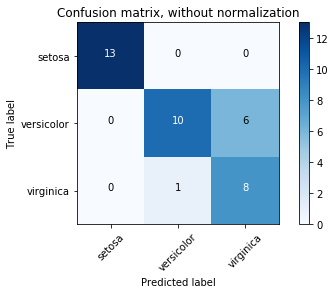

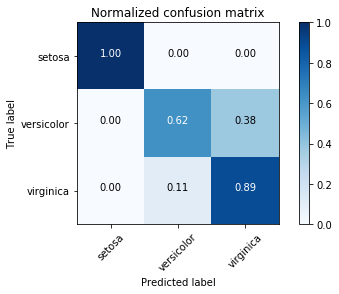

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# import some data 
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Create training and test data sets
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.25, random_state=0)

# Initialise a new scaling object for normalising input data
sc=StandardScaler() 

# Set up the scaler just on the training set
sc.fit(X_train)

# Apply the scaler to the training and test sets
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

# Run logistic regression model from sklearn

from sklearn.linear_model import LogisticRegression

# Deliberately over-regularise model with low C to create more error
lr=LogisticRegression(C=1,random_state=0)
lr.fit(X_train_std,y_train)

# predict test set
y_pred=lr.predict(X_test_std)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)
    print ()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
